In [1]:
!pip install nltk 
!pip install wordcloud
!pip install gensim
!pip install seaborn

import nltk
nltk.download('punkt') #'punkt'- convert data set in the form of list

import tensorflow as tf #tensorflow - used for neural network and deep learning
import pandas as pd #used to read csv file
import numpy as np #used to do some mathematical calculations
import matplotlib.pyplot as plt #used to plot graph and images
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python39\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python39\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python39\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\program files\python39\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df_true=pd.read_csv(r'True.csv')
df_fake=pd.read_csv(r'Fake.csv')


In [3]:
df_true

title   
0      As U.S. budget fight looms, Republicans flip t...  \
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text       subject   
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews  \
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
...                                                  ...           ...   
21412  BRUSSELS (Reuters) - NATO allies on Tuesday we...     worldnews   
21413  LONDON (Reuters) - LexisNexis, a provider of l...     worldnews   
21414  MINSK (Reuters) - In the shadow of disused Sov...     worldnews   
21415  MOSCOW (Reuters) - Vatican Secretary of State ...     worldnews   
21416  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...     worldnews   

                     date  
0      December 31, 2017   
1      December 29, 2017   
2      December 31, 2017   
3      December 30, 2017   
4      December 29, 2017   
...                   ...  
21412    August 22, 2017   
21413    August 22, 2017   
21414    August 22, 2017   
21415    August 22, 2017   
21416    August 22, 2017   

[21417 rows x 4 columns]

In [4]:
df_fake.isnull().sum() #check if any null value is present in dataset or not

title      0
text       0
subject    0
date       0
dtype: int64

In [5]:
df_true.isnull().sum() 

title      0
text       0
subject    0
date       0
dtype: int64

In [6]:
df_fake.info()# check for memory usage 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [7]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [8]:
#feature engineering 
#1->true 0->false
df_true['isfake']=1 #adding a new column isfake(boolean)
df_true.head() 


title   
0  As U.S. budget fight looms, Republicans flip t...  \
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject   
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews  \
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  isfake  
0  December 31, 2017        1  
1  December 29, 2017        1  
2  December 31, 2017        1  
3  December 30, 2017        1  
4  December 29, 2017        1

In [9]:
df_fake['isfake']=0
df_fake.head() 

title   
0   Donald Trump Sends Out Embarrassing New Year’...  \
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject   
0  Donald Trump just couldn t wish all Americans ...    News  \
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  isfake  
0  December 31, 2017       0  
1  December 31, 2017       0  
2  December 30, 2017       0  
3  December 29, 2017       0  
4  December 25, 2017       0

In [10]:
df=pd.concat([df_true,df_fake]).reset_index(drop=True)# concatenate fake and true dataset
#reset_index() -> makes index in continuous fashion 
df

title   
0      As U.S. budget fight looms, Republicans flip t...  \
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
44893  McPain: John McCain Furious That Iran Treated ...   
44894  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
44895  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
44896  How to Blow $700 Million: Al Jazeera America F...   
44897  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text       subject   
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews  \
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
...                                                  ...           ...   
44893  21st Century Wire says As 21WIRE reported earl...   Middle-east   
44894  21st Century Wire says It s a familiar theme. ...   Middle-east   
44895  Patrick Henningsen  21st Century WireRemember ...   Middle-east   
44896  21st Century Wire says Al Jazeera America will...   Middle-east   
44897  21st Century Wire says As 21WIRE predicted in ...   Middle-east   

                     date  isfake  
0      December 31, 2017        1  
1      December 29, 2017        1  
2      December 31, 2017        1  
3      December 30, 2017        1  
4      December 29, 2017        1  
...                   ...     ...  
44893    January 16, 2016       0  
44894    January 16, 2016       0  
44895    January 15, 2016       0  
44896    January 14, 2016       0  
44897    January 12, 2016       0  

[44898 rows x 5 columns]

In [11]:
df.drop(columns=['date'],inplace=True) #drop the date column
#inplace make sure that the date is deleted from the memory too
df

title   
0      As U.S. budget fight looms, Republicans flip t...  \
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
44893  McPain: John McCain Furious That Iran Treated ...   
44894  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
44895  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
44896  How to Blow $700 Million: Al Jazeera America F...   
44897  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text       subject  isfake  
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews       1  
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews       1  
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews       1  
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews       1  
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews       1  
...                                                  ...           ...     ...  
44893  21st Century Wire says As 21WIRE reported earl...   Middle-east       0  
44894  21st Century Wire says It s a familiar theme. ...   Middle-east       0  
44895  Patrick Henningsen  21st Century WireRemember ...   Middle-east       0  
44896  21st Century Wire says Al Jazeera America will...   Middle-east       0  
44897  21st Century Wire says As 21WIRE predicted in ...   Middle-east       0  

[44898 rows x 4 columns]

In [12]:
df['original']=df['title']+' '+df['text'] #a new column original is created which is a combination of title and text
df.head()

title   
0  As U.S. budget fight looms, Republicans flip t...  \
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  isfake   
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews       1  \
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews       1   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews       1   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews       1   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews       1   

                                            original  
0  As U.S. budget fight looms, Republicans flip t...  
1  U.S. military to accept transgender recruits o...  
2  Senior U.S. Republican senator: 'Let Mr. Muell...  
3  FBI Russia probe helped by Australian diplomat...  
4  Trump wants Postal Service to charge 'much mor...

In [13]:
df['original'][0] #printing the first element of original column

'As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
from nltk.corpus import stopwords #stopwords are the words that doesn't have much significance 
#e.g as, of, them
stop_words=stopwords.words('english')#each grammer word will get removed and the important word will only remain 
stop_words.extend(['from','subject','re','edu','use'])# remove the mentioned words

In [16]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [17]:
#remove words which is has 2 or less than it characters
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

def preprocess(text):
  result=[]
  for token in gensim.utils.simple_preprocess(text):
    if token not in gensim.parsing.preprocessing.STOPWORDS and len(token)>3 and token not in stop_words:
      result.append(token)
  return result

In [18]:
df['clean']=df['original'].apply(preprocess)

In [19]:
df

title   
0      As U.S. budget fight looms, Republicans flip t...  \
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
44893  McPain: John McCain Furious That Iran Treated ...   
44894  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
44895  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
44896  How to Blow $700 Million: Al Jazeera America F...   
44897  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text       subject   
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews  \
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
...                                                  ...           ...   
44893  21st Century Wire says As 21WIRE reported earl...   Middle-east   
44894  21st Century Wire says It s a familiar theme. ...   Middle-east   
44895  Patrick Henningsen  21st Century WireRemember ...   Middle-east   
44896  21st Century Wire says Al Jazeera America will...   Middle-east   
44897  21st Century Wire says As 21WIRE predicted in ...   Middle-east   

       isfake                                           original   
0           1  As U.S. budget fight looms, Republicans flip t...  \
1           1  U.S. military to accept transgender recruits o...   
2           1  Senior U.S. Republican senator: 'Let Mr. Muell...   
3           1  FBI Russia probe helped by Australian diplomat...   
4           1  Trump wants Postal Service to charge 'much mor...   
...       ...                                                ...   
44893       0  McPain: John McCain Furious That Iran Treated ...   
44894       0  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
44895       0  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
44896       0  How to Blow $700 Million: Al Jazeera America F...   
44897       0  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                   clean  
0      [budget, fight, looms, republicans, flip, fisc...  
1      [military, accept, transgender, recruits, mond...  
2      [senior, republican, senator, mueller, washing...  
3      [russia, probe, helped, australian, diplomat, ...  
4      [trump, wants, postal, service, charge, amazon...  
...                                                  ...  
44893  [mcpain, john, mccain, furious, iran, treated,...  
44894  [justice, yahoo, settles, mail, privacy, class...  
44895  [sunnistan, allied, safe, zone, plan, territor...  
44896  [blow, million, jazeera, america, finally, cal...  
44897  [navy, sailors, held, iranian, military, signs...  

[44898 rows x 6 columns]

In [20]:
print(df['clean'][0])

['budget', 'fight', 'looms', 'republicans', 'flip', 'fiscal', 'script', 'washington', 'reuters', 'head', 'conservative', 'republican', 'faction', 'congress', 'voted', 'month', 'huge', 'expansion', 'national', 'debt', 'cuts', 'called', 'fiscal', 'conservative', 'sunday', 'urged', 'budget', 'restraint', 'keeping', 'sharp', 'pivot', 'republicans', 'representative', 'mark', 'meadows', 'speaking', 'face', 'nation', 'drew', 'hard', 'line', 'federal', 'spending', 'lawmakers', 'bracing', 'battle', 'january', 'return', 'holidays', 'wednesday', 'lawmakers', 'begin', 'trying', 'pass', 'federal', 'budget', 'fight', 'likely', 'linked', 'issues', 'immigration', 'policy', 'november', 'congressional', 'election', 'campaigns', 'approach', 'republicans', 'seek', 'control', 'congress', 'president', 'donald', 'trump', 'republicans', 'want', 'budget', 'increase', 'military', 'spending', 'democrats', 'want', 'proportional', 'increases', 'defense', 'discretionary', 'spending', 'programs', 'support', 'educati

In [21]:
#creating a list which contain all the words of clean column
list_of_words=[]
for i in df.clean:
  for j in i:
    list_of_words.append(j)

In [22]:
list_of_words

['budget',
 'fight',
 'looms',
 'republicans',
 'flip',
 'fiscal',
 'script',
 'washington',
 'reuters',
 'head',
 'conservative',
 'republican',
 'faction',
 'congress',
 'voted',
 'month',
 'huge',
 'expansion',
 'national',
 'debt',
 'cuts',
 'called',
 'fiscal',
 'conservative',
 'sunday',
 'urged',
 'budget',
 'restraint',
 'keeping',
 'sharp',
 'pivot',
 'republicans',
 'representative',
 'mark',
 'meadows',
 'speaking',
 'face',
 'nation',
 'drew',
 'hard',
 'line',
 'federal',
 'spending',
 'lawmakers',
 'bracing',
 'battle',
 'january',
 'return',
 'holidays',
 'wednesday',
 'lawmakers',
 'begin',
 'trying',
 'pass',
 'federal',
 'budget',
 'fight',
 'likely',
 'linked',
 'issues',
 'immigration',
 'policy',
 'november',
 'congressional',
 'election',
 'campaigns',
 'approach',
 'republicans',
 'seek',
 'control',
 'congress',
 'president',
 'donald',
 'trump',
 'republicans',
 'want',
 'budget',
 'increase',
 'military',
 'spending',
 'democrats',
 'want',
 'proportional',
 '

In [23]:
len(list_of_words)

9276947

In [24]:
#no of unique words
total_words=len(list(set(list_of_words)))
total_words

108704

In [25]:
#joing the words again to form a sentence so as the NLP Algorthim can work in that sentence
df['clean_joined']=df['clean'].apply(lambda x:" ".join(x))
df

title   
0      As U.S. budget fight looms, Republicans flip t...  \
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
44893  McPain: John McCain Furious That Iran Treated ...   
44894  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
44895  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
44896  How to Blow $700 Million: Al Jazeera America F...   
44897  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text       subject   
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews  \
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
...                                                  ...           ...   
44893  21st Century Wire says As 21WIRE reported earl...   Middle-east   
44894  21st Century Wire says It s a familiar theme. ...   Middle-east   
44895  Patrick Henningsen  21st Century WireRemember ...   Middle-east   
44896  21st Century Wire says Al Jazeera America will...   Middle-east   
44897  21st Century Wire says As 21WIRE predicted in ...   Middle-east   

       isfake                                           original   
0           1  As U.S. budget fight looms, Republicans flip t...  \
1           1  U.S. military to accept transgender recruits o...   
2           1  Senior U.S. Republican senator: 'Let Mr. Muell...   
3           1  FBI Russia probe helped by Australian diplomat...   
4           1  Trump wants Postal Service to charge 'much mor...   
...       ...                                                ...   
44893       0  McPain: John McCain Furious That Iran Treated ...   
44894       0  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
44895       0  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
44896       0  How to Blow $700 Million: Al Jazeera America F...   
44897       0  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                   clean   
0      [budget, fight, looms, republicans, flip, fisc...  \
1      [military, accept, transgender, recruits, mond...   
2      [senior, republican, senator, mueller, washing...   
3      [russia, probe, helped, australian, diplomat, ...   
4      [trump, wants, postal, service, charge, amazon...   
...                                                  ...   
44893  [mcpain, john, mccain, furious, iran, treated,...   
44894  [justice, yahoo, settles, mail, privacy, class...   
44895  [sunnistan, allied, safe, zone, plan, territor...   
44896  [blow, million, jazeera, america, finally, cal...   
44897  [navy, sailors, held, iranian, military, signs...   

                                            clean_joined  
0      budget fight looms republicans flip fiscal scr...  
1      military accept transgender recruits monday pe...  
2      senior republican senator mueller washington r...  
3      russia probe helped australian diplomat washin...  
4      trump wants postal service charge amazon shipm...  
...                                                  ...  
44893  mcpain john mccain furious iran treated sailor...  
44894  justice yahoo settles mail privacy class actio...  
44895  sunnistan allied safe zone plan territorial bo...  
44896  blow million jazeera america finally calls qui...  
44897  navy sailors held iranian military signs neoco...  

[44898 rows x 7 columns]

<Axes: xlabel='count', ylabel='subject'>

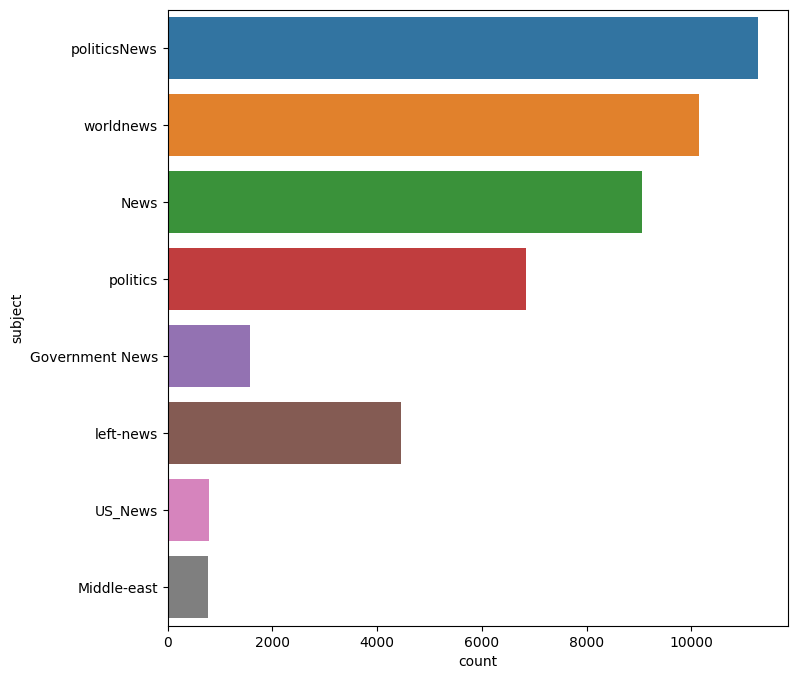

In [26]:
#plotting the graph 
plt.figure(figsize=(8,8))
sns.countplot(y='subject',data=df)

<Axes: xlabel='count', ylabel='isfake'>

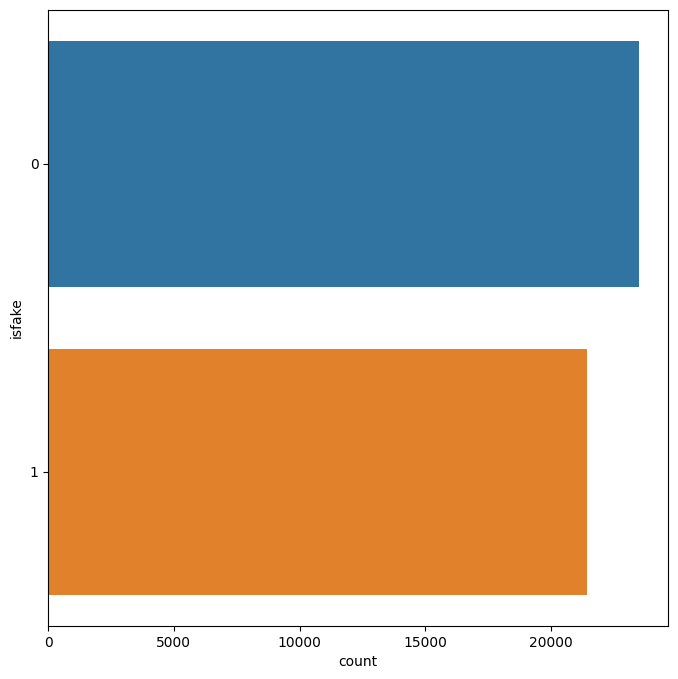

In [27]:
#plotting the graph 
plt.figure(figsize=(8,8))
sns.countplot(y='isfake',data=df)
#from the below graph we came to know that the difference between fake and real news is not more so its a good fit dataset

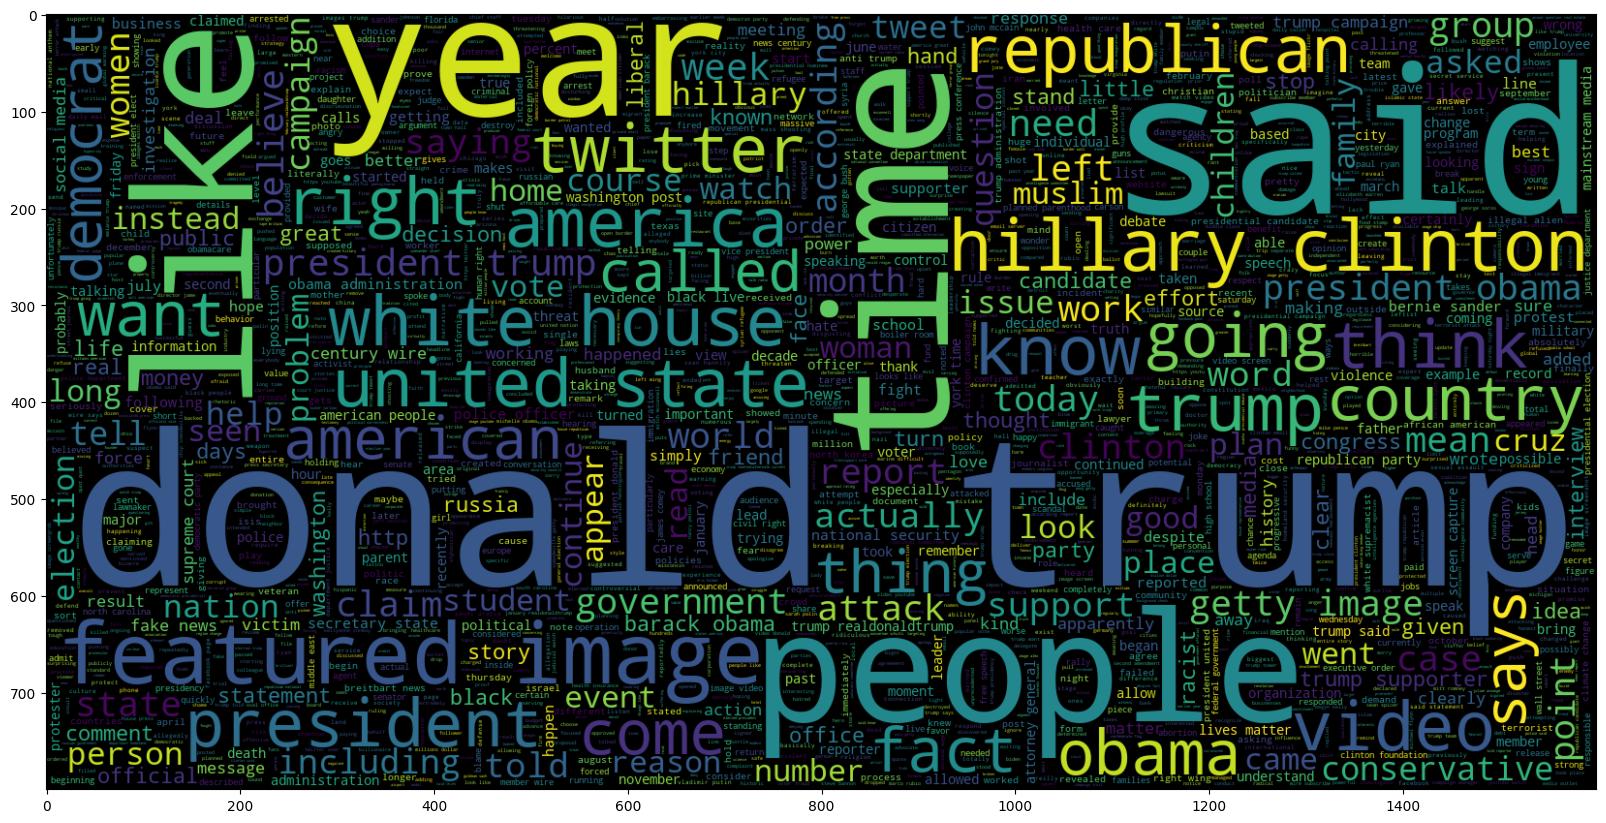

In [28]:
#printing worldcloud of fake words
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=2000,width=1600,height=800,stopwords=stop_words).generate(" ".join(df[df.isfake==0].clean_joined))
plt.imshow(wc,interpolation='bilinear')

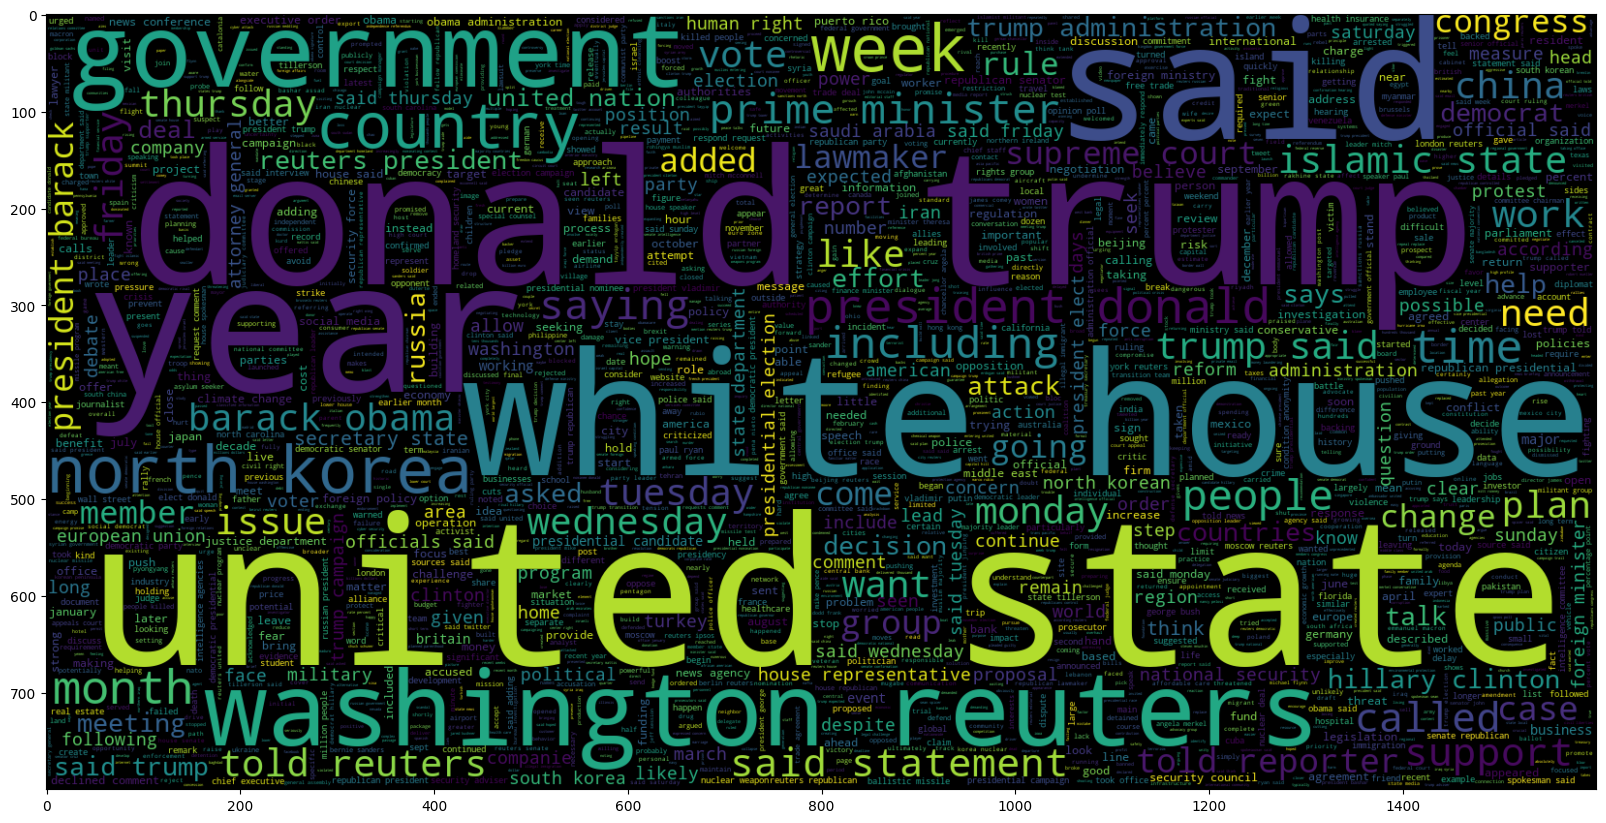

In [29]:
#printing worldcloud of true words
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=2000,width=1600,height=800,stopwords=stop_words).generate(" ".join(df[df.isfake==1].clean_joined))
plt.imshow(wc,interpolation='bilinear')

In [30]:
#word embddding
from nltk.tokenize import word_tokenize 
maxlen=-1
for doc in df.clean_joined:
  tokens=nltk.word_tokenize(doc)
  if(maxlen<len(tokens)):
    maxlen=len(tokens)

print('The maximum number of words in any document is = ',maxlen) # in each row what is the maximum no of words present 


The maximum number of words in any document is =  4405


In [31]:
import plotly.express as px
fig=px.histogram(x=[len(nltk.word_tokenize(x)) for x in df.clean_joined], nbins=100)

In [32]:
fig.show()

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test= train_test_split(df.clean_joined,df.isfake,test_size=0.2)


In [35]:
#performing tokenization-  assigning a number to particular word
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer(num_words=total_words)
tokenizer.fit_on_texts(x_train)
train_sequences=tokenizer.texts_to_sequences(x_train)
test_sequences=tokenizer.texts_to_sequences(x_test)


In [36]:
len(train_sequences)

35918

In [37]:
len(test_sequences)

8980

In [38]:
print('the encoding for document\n', df.clean_joined[0],'\n is: ',train_sequences[0])
#printing the words and their respective token numbers 
#here we are tokenizing because ML cannot apply on string it only applys on int 

the encoding for document
 budget fight looms republicans flip fiscal script washington reuters head conservative republican faction congress voted month huge expansion national debt cuts called fiscal conservative sunday urged budget restraint keeping sharp pivot republicans representative mark meadows speaking face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy november congressional election campaigns approach republicans seek control congress president donald trump republicans want budget increase military spending democrats want proportional increases defense discretionary spending programs support education scientific research infrastructure public health environmental protection trump administration willing going increase defense discretionary spending percent meadows chairman small influential house freedom caucus said program democrats say

In [39]:
# performing padding- to make the maximum number of words in each news equals to max_length=4405
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_train=pad_sequences(train_sequences,maxlen=4405, padding='post', truncating='post')
padded_test=pad_sequences(test_sequences,maxlen=4405, padding='post', truncating='post')

In [40]:
for i,doc in enumerate(padded_train[:2]):
  print('the padded encoding for documents ',i+1,'is:',doc)

the padded encoding for documents  1 is: [5144    1    3 ...    0    0    0]
the padded encoding for documents  2 is: [5964 3096  776 ...    0    0    0]


In [41]:
#IMPLEMENTING the LSTM model

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,Bidirectional,LSTM
model=Sequential()
model.add(Embedding(total_words,output_dim=128))
model.add(Bidirectional(LSTM(128)))

model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['acc']) #acc=accuracy

In [43]:
total_words

108704

In [44]:
y_train=np.asarray(y_train)

In [45]:
model.fit(padded_train,y_train,batch_size=64,validation_split=0.1,epochs=2)#padded_train ->  input,  y_train -> output

Epoch 1/2
 28/506 [>.............................] - ETA: 43:25:38 - loss: 0.4904 - acc: 0.7762

KeyboardInterrupt: 

In [ ]:
pred=model.predict(padded_test)
prediction=[]
for i in range(len(pred)):
  if pred[i].item()>0.5:
    prediction.append(1);#real
  else:
    prediction.append(0);#fake

#calculating the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(list(y_test),prediction)
print('Model Acccuracy: ',accuracy)

#using the confusion matrix to see how well our model can predict
from sklear.metrics import confusion_matrix
cm=confusion_matrix(list(y_test),prediction)
plt.figure(fig_size=(25,25))
sns.heatmap(cm, annot=True)

In [ ]:
LSTM_prediction = model.predict(vectorization.transform(['Narendra Modi is the Prime Minister of India']))
print(LSTM_prediction)